In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
data = pd.read_csv('FlightPriceData.csv')

In [8]:
data.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953"
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953"
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956"
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955"
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955"


EDA

In [9]:
data.isnull().sum()

date          0
airline       0
ch_code       0
num_code      0
dep_time      0
from          0
time_taken    0
stop          0
arr_time      0
to            0
price         0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206774 entries, 0 to 206773
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        206774 non-null  object
 1   airline     206774 non-null  object
 2   ch_code     206774 non-null  object
 3   num_code    206774 non-null  int64 
 4   dep_time    206774 non-null  object
 5   from        206774 non-null  object
 6   time_taken  206774 non-null  object
 7   stop        206774 non-null  object
 8   arr_time    206774 non-null  object
 9   to          206774 non-null  object
 10  price       206774 non-null  object
dtypes: int64(1), object(10)
memory usage: 17.4+ MB


In [11]:
data['stop']

0                                                 non-stop 
1                                                 non-stop 
2                                                 non-stop 
3                                                 non-stop 
4                                                 non-stop 
                                ...                        
206769    1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...
206770    1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...
206771    1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...
206772    1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...
206773    1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...
Name: stop, Length: 206774, dtype: object

In [12]:
df=data

In [13]:
df.shape

(206774, 11)

In [14]:
df.columns

Index(['date', 'airline', 'ch_code', 'num_code', 'dep_time', 'from',
       'time_taken', 'stop', 'arr_time', 'to', 'price'],
      dtype='object')

In [15]:
# sns.boxplot(data=df, x='airline', y='price', hue='price')

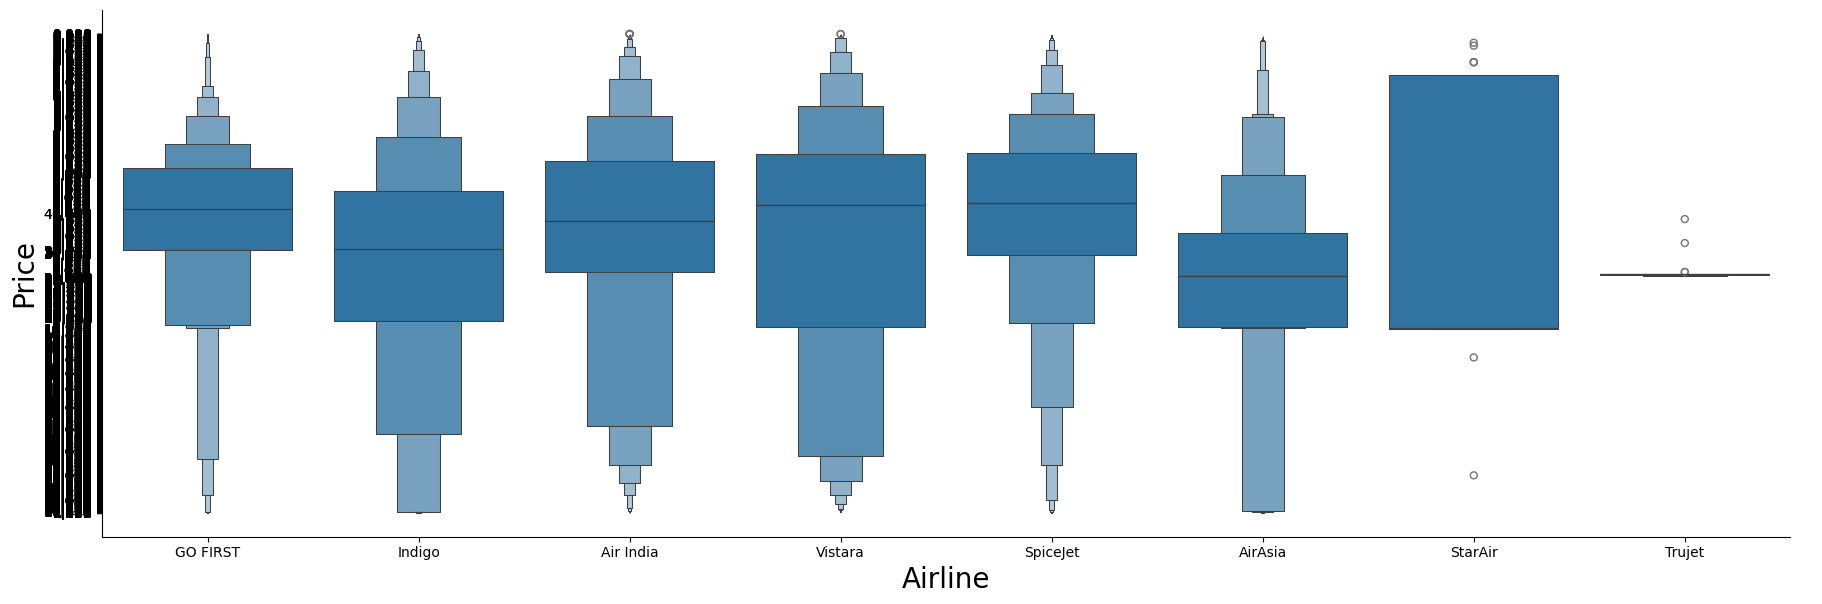

In [16]:
sns.catplot(y = 'price', x = 'airline', data = data.sort_values('price', ascending=False),kind='boxen',height = 6, aspect = 3)
plt.xlabel('Airline',size=20)
plt.ylabel('Price',size=20)
plt.show()

In [17]:
df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953"
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953"
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956"
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955"
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955"


In [18]:
df['Departure_Hour']= df['dep_time'].str.split(':').str[0]
df['Departure_Min']= df['dep_time'].str.split(':').str[1]
df['Arrival_Hour']= df['arr_time'].str.split(':').str[0]
df['Arrival_Min']= df['arr_time'].str.split(':').str[1]


In [19]:
df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,Departure_Hour,Departure_Min,Arrival_Hour,Arrival_Min
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",18,55,21,05
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",06,20,08,40
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956",04,25,06,35
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955",10,20,12,35
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955",08,50,11,10


In [20]:
df.drop(['date','dep_time','arr_time'],axis=1,inplace=True)

In [21]:
df.head(15)

,airline,ch_code,num_code,from,time_taken,stop,to,price,Departure_Hour,Departure_Min,Arrival_Hour,Arrival_Min
0,SpiceJet,SG,8709,Delhi,02h 10m,non-stop,Mumbai,"5,953",18,55,21,05
1,SpiceJet,SG,8157,Delhi,02h 20m,non-stop,Mumbai,"5,953",06,20,08,40
2,AirAsia,I5,764,Delhi,02h 10m,non-stop,Mumbai,"5,956",04,25,06,35
3,Vistara,UK,995,Delhi,02h 15m,non-stop,Mumbai,"5,955",10,20,12,35
4,Vistara,UK,963,Delhi,02h 20m,non-stop,Mumbai,"5,955",08,50,11,10
5,Vistara,UK,945,Delhi,02h 20m,non-stop,Mumbai,"5,955",11,40,14,00
6,Vistara,UK,927,Delhi,02h 05m,non-stop,Mumbai,"6,060",09,30,11,35
7,Vistara,UK,951,Delhi,02h 10m,non-stop,Mumbai,"6,060",14,20,16,30
8,GO FIRST,G8,334,Delhi,02h 10m,non-stop,Mumbai,"5,954",08,00,10,10
9,GO FIRST,G8,336,Delhi,02h 15m,non-stop,Mumbai,"5,954",14,20,16,35


In [22]:
df['stop'].unique()

array(['non-stop ',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXU\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Chennai\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Indore\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia RPR\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '2+-stop',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Lucknow\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia GOP\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Raipur\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Nagpur\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Surat\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Hyderabad\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia STV\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t

In [23]:
df['stop']=df['stop'].str.split('\n').str[0]

In [24]:
df['stop'].unique()

array(['non-stop ', '1-stop', '2+-stop'], dtype=object)

In [25]:
df.replace({'non-stop ':0, '1-stop':1, '2+-stop':2},inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_21328\3937800590.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'non-stop ':0, '1-stop':1, '2+-stop':2},inplace=True)


In [26]:
df.head(100)

,airline,ch_code,num_code,from,time_taken,stop,to,price,Departure_Hour,Departure_Min,Arrival_Hour,Arrival_Min
0,SpiceJet,SG,8709,Delhi,02h 10m,0,Mumbai,"5,953",18,55,21,05
1,SpiceJet,SG,8157,Delhi,02h 20m,0,Mumbai,"5,953",06,20,08,40
2,AirAsia,I5,764,Delhi,02h 10m,0,Mumbai,"5,956",04,25,06,35
3,Vistara,UK,995,Delhi,02h 15m,0,Mumbai,"5,955",10,20,12,35
4,Vistara,UK,963,Delhi,02h 20m,0,Mumbai,"5,955",08,50,11,10
...,...,...,...,...,...,...,...,...,...,...,...,...
95,Vistara,UK,737,Delhi,07h 35m,1,Mumbai,"17,610",15,55,23,30
96,Air India,AI,762,Delhi,23h 50m,1,Mumbai,"17,295",20,15,20,05
97,Vistara,UK,673,Delhi,05h 00m,1,Mumbai,"17,663",13,20,18,20
98,Air India,AI,839,Delhi,26h 30m,1,Mumbai,"18,030",21,25,23,55


In [27]:
df['stop'].value_counts()

stop
1    166627
0     27942
2     12205
Name: count, dtype: int64

In [28]:
# df['Journey_Day']=pd.to_datetime(data['date'],format='mixed').dt.day
# df['Journey_Month']=pd.to_datetime(data['date'],format='mixed').dt.month
# df.head()

In [29]:
df['TimeTaken_hour']=df['time_taken'].str.split(' ').str[0]
df['TimeTaken_min']=df['time_taken'].str.split(' ').str[1]

In [30]:
df['TimeTaken_hour']=df['TimeTaken_hour'].str.split('h').str[0]
df['TimeTaken_min']=df['TimeTaken_min'].str.split('m').str[0]

In [31]:
df.head(2)

,airline,ch_code,num_code,from,time_taken,stop,to,price,Departure_Hour,Departure_Min,Arrival_Hour,Arrival_Min,TimeTaken_hour,TimeTaken_min
0,SpiceJet,SG,8709,Delhi,02h 10m,0,Mumbai,"5,953",18,55,21,05,02,10
1,SpiceJet,SG,8157,Delhi,02h 20m,0,Mumbai,"5,953",06,20,08,40,02,20


In [32]:
df.drop(['time_taken'],axis=1,inplace=True)

In [33]:
df['airline'].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO FIRST', 'Indigo',
       'Air India', 'Trujet', 'StarAir'], dtype=object)

In [34]:
from sklearn.preprocessing import LabelEncoder
labelenc=LabelEncoder()
df['airline']=labelenc.fit_transform(df['airline'])
df['from']=labelenc.fit_transform(df['from'])
df['to']=labelenc.fit_transform(df['to'])

In [35]:
df.head(2)

,airline,ch_code,num_code,from,stop,to,price,Departure_Hour,Departure_Min,Arrival_Hour,Arrival_Min,TimeTaken_hour,TimeTaken_min
0,4,SG,8709,2,0,5,"5,953",18,55,21,05,02,10
1,4,SG,8157,2,0,5,"5,953",06,20,08,40,02,20


In [36]:
df['ch_code'].unique(), df['num_code'].unique()

(array(['SG', 'I5', 'UK', 'G8', '6E', 'AI', '2T', 'S5'], dtype=object),
 array([8709, 8157,  764, ..., 7141, 7127, 7259], dtype=int64))

In [37]:
df.drop(['ch_code','num_code'],inplace=True,axis=1)

In [38]:
df.head()

,airline,from,stop,to,price,Departure_Hour,Departure_Min,Arrival_Hour,Arrival_Min,TimeTaken_hour,TimeTaken_min
0,4,2,0,5,"5,953",18,55,21,05,02,10
1,4,2,0,5,"5,953",06,20,08,40,02,20
2,1,2,0,5,"5,956",04,25,06,35,02,10
3,7,2,0,5,"5,955",10,20,12,35,02,15
4,7,2,0,5,"5,955",08,50,11,10,02,20


In [39]:
df.shape

(206774, 11)

In [40]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
ohe.fit_transform(np.array(df['airline']).reshape(-1,1))

<206774x8 sparse matrix of type '<class 'numpy.float64'>'
	with 206774 stored elements in Compressed Sparse Row format>

In [41]:
df.head()

,airline,from,stop,to,price,Departure_Hour,Departure_Min,Arrival_Hour,Arrival_Min,TimeTaken_hour,TimeTaken_min
0,4,2,0,5,"5,953",18,55,21,05,02,10
1,4,2,0,5,"5,953",06,20,08,40,02,20
2,1,2,0,5,"5,956",04,25,06,35,02,10
3,7,2,0,5,"5,955",10,20,12,35,02,15
4,7,2,0,5,"5,955",08,50,11,10,02,20


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206774 entries, 0 to 206773
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   airline         206774 non-null  int32 
 1   from            206774 non-null  int32 
 2   stop            206774 non-null  int64 
 3   to              206774 non-null  int32 
 4   price           206774 non-null  object
 5   Departure_Hour  206774 non-null  object
 6   Departure_Min   206774 non-null  object
 7   Arrival_Hour    206774 non-null  object
 8   Arrival_Min     206774 non-null  object
 9   TimeTaken_hour  206774 non-null  object
 10  TimeTaken_min   206774 non-null  object
dtypes: int32(3), int64(1), object(7)
memory usage: 15.0+ MB


In [43]:
pd.get_dummies(df,columns=["airline", "from", "to"] ,drop_first = True)

,stop,price,Departure_Hour,Departure_Min,Arrival_Hour,Arrival_Min,TimeTaken_hour,TimeTaken_min,airline_1,airline_2,...,from_1,from_2,from_3,from_4,from_5,to_1,to_2,to_3,to_4,to_5
0,0,"5,953",18,55,21,05,02,10,False,False,...,False,True,False,False,False,False,False,False,False,True
1,0,"5,953",06,20,08,40,02,20,False,False,...,False,True,False,False,False,False,False,False,False,True
2,0,"5,956",04,25,06,35,02,10,True,False,...,False,True,False,False,False,False,False,False,False,True
3,0,"5,955",10,20,12,35,02,15,False,False,...,False,True,False,False,False,False,False,False,False,True
4,0,"5,955",08,50,11,10,02,20,False,False,...,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206769,1,"7,697",07,05,20,55,13,50,False,False,...,True,False,False,False,False,False,False,True,False,False
206770,1,"7,709",07,05,20,55,13,50,False,False,...,True,False,False,False,False,False,False,True,False,False
206771,1,"8,640",12,30,09,05,20,35,False,False,...,True,False,False,False,False,False,False,True,False,False
206772,1,"8,640",09,45,09,05,23,20,False,False,...,True,False,False,False,False,False,False,True,False,False


In [44]:

df['Departure_Min']=df['Departure_Min'].astype(int)
df['Departure_Hour']=df['Departure_Hour'].astype(int)
df['Arrival_Min']=df['Arrival_Min'].astype(int)
df['Arrival_Hour']=df['Arrival_Hour'].astype(int)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206774 entries, 0 to 206773
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   airline         206774 non-null  int32 
 1   from            206774 non-null  int32 
 2   stop            206774 non-null  int64 
 3   to              206774 non-null  int32 
 4   price           206774 non-null  object
 5   Departure_Hour  206774 non-null  int32 
 6   Departure_Min   206774 non-null  int32 
 7   Arrival_Hour    206774 non-null  int32 
 8   Arrival_Min     206774 non-null  int32 
 9   TimeTaken_hour  206774 non-null  object
 10  TimeTaken_min   206774 non-null  object
dtypes: int32(7), int64(1), object(3)
memory usage: 11.8+ MB


In [46]:
df['price']=df['price'].str.split(',').str[0]+df['price'].str.split(',').str[1]

In [47]:
df['price']=df['price'].astype(int)

In [48]:
df.head()

,airline,from,stop,to,price,Departure_Hour,Departure_Min,Arrival_Hour,Arrival_Min,TimeTaken_hour,TimeTaken_min
0,4,2,0,5,5953,18,55,21,5,02,10
1,4,2,0,5,5953,6,20,8,40,02,20
2,1,2,0,5,5956,4,25,6,35,02,10
3,7,2,0,5,5955,10,20,12,35,02,15
4,7,2,0,5,5955,8,50,11,10,02,20


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206774 entries, 0 to 206773
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   airline         206774 non-null  int32 
 1   from            206774 non-null  int32 
 2   stop            206774 non-null  int64 
 3   to              206774 non-null  int32 
 4   price           206774 non-null  int32 
 5   Departure_Hour  206774 non-null  int32 
 6   Departure_Min   206774 non-null  int32 
 7   Arrival_Hour    206774 non-null  int32 
 8   Arrival_Min     206774 non-null  int32 
 9   TimeTaken_hour  206774 non-null  object
 10  TimeTaken_min   206774 non-null  object
dtypes: int32(8), int64(1), object(2)
memory usage: 11.0+ MB


In [50]:
df['TimeTaken_min'].replace('', 0, inplace=True)
df['TimeTaken_min']=df['TimeTaken_min'].astype(float)

C:\Users\Dell\AppData\Local\Temp\ipykernel_21328\2792647958.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TimeTaken_min'].replace('', 0, inplace=True)


In [51]:
df['TimeTaken_min']=df['TimeTaken_min'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206774 entries, 0 to 206773
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   airline         206774 non-null  int32 
 1   from            206774 non-null  int32 
 2   stop            206774 non-null  int64 
 3   to              206774 non-null  int32 
 4   price           206774 non-null  int32 
 5   Departure_Hour  206774 non-null  int32 
 6   Departure_Min   206774 non-null  int32 
 7   Arrival_Hour    206774 non-null  int32 
 8   Arrival_Min     206774 non-null  int32 
 9   TimeTaken_hour  206774 non-null  object
 10  TimeTaken_min   206774 non-null  int32 
dtypes: int32(9), int64(1), object(1)
memory usage: 10.3+ MB


In [52]:
df['TimeTaken_hour']=df['TimeTaken_hour'].astype(float)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206774 entries, 0 to 206773
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   airline         206774 non-null  int32  
 1   from            206774 non-null  int32  
 2   stop            206774 non-null  int64  
 3   to              206774 non-null  int32  
 4   price           206774 non-null  int32  
 5   Departure_Hour  206774 non-null  int32  
 6   Departure_Min   206774 non-null  int32  
 7   Arrival_Hour    206774 non-null  int32  
 8   Arrival_Min     206774 non-null  int32  
 9   TimeTaken_hour  206774 non-null  float64
 10  TimeTaken_min   206774 non-null  int32  
dtypes: float64(1), int32(9), int64(1)
memory usage: 10.3 MB


In [54]:
pd.get_dummies(df,columns=["airline", "from", "to"] ,drop_first = True)

,stop,price,Departure_Hour,Departure_Min,Arrival_Hour,Arrival_Min,TimeTaken_hour,TimeTaken_min,airline_1,airline_2,...,from_1,from_2,from_3,from_4,from_5,to_1,to_2,to_3,to_4,to_5
0,0,5953,18,55,21,5,2.0,10,False,False,...,False,True,False,False,False,False,False,False,False,True
1,0,5953,6,20,8,40,2.0,20,False,False,...,False,True,False,False,False,False,False,False,False,True
2,0,5956,4,25,6,35,2.0,10,True,False,...,False,True,False,False,False,False,False,False,False,True
3,0,5955,10,20,12,35,2.0,15,False,False,...,False,True,False,False,False,False,False,False,False,True
4,0,5955,8,50,11,10,2.0,20,False,False,...,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206769,1,7697,7,5,20,55,13.0,50,False,False,...,True,False,False,False,False,False,False,True,False,False
206770,1,7709,7,5,20,55,13.0,50,False,False,...,True,False,False,False,False,False,False,True,False,False
206771,1,8640,12,30,9,5,20.0,35,False,False,...,True,False,False,False,False,False,False,True,False,False
206772,1,8640,9,45,9,5,23.0,20,False,False,...,True,False,False,False,False,False,False,True,False,False


Feature Selection

In [55]:
df.shape

(206774, 11)

In [56]:
df.columns

Index(['airline', 'from', 'stop', 'to', 'price', 'Departure_Hour',
       'Departure_Min', 'Arrival_Hour', 'Arrival_Min', 'TimeTaken_hour',
       'TimeTaken_min'],
      dtype='object')

In [57]:
X= df.loc[:,['airline', 'from', 'stop', 'to', 'Departure_Hour','Arrival_Min', 'Departure_Min', 'Arrival_Hour','TimeTaken_hour', 'TimeTaken_min']]

In [58]:
X.head()

,airline,from,stop,to,Departure_Hour,Arrival_Min,Departure_Min,Arrival_Hour,TimeTaken_hour,TimeTaken_min
0,4,2,0,5,18,5,55,21,2.0,10
1,4,2,0,5,6,40,20,8,2.0,20
2,1,2,0,5,4,35,25,6,2.0,10
3,7,2,0,5,10,35,20,12,2.0,15
4,7,2,0,5,8,10,50,11,2.0,20


In [59]:
y=df.iloc[:,4]
y.head()

0    5953
1    5953
2    5956
3    5955
4    5955
Name: price, dtype: int32

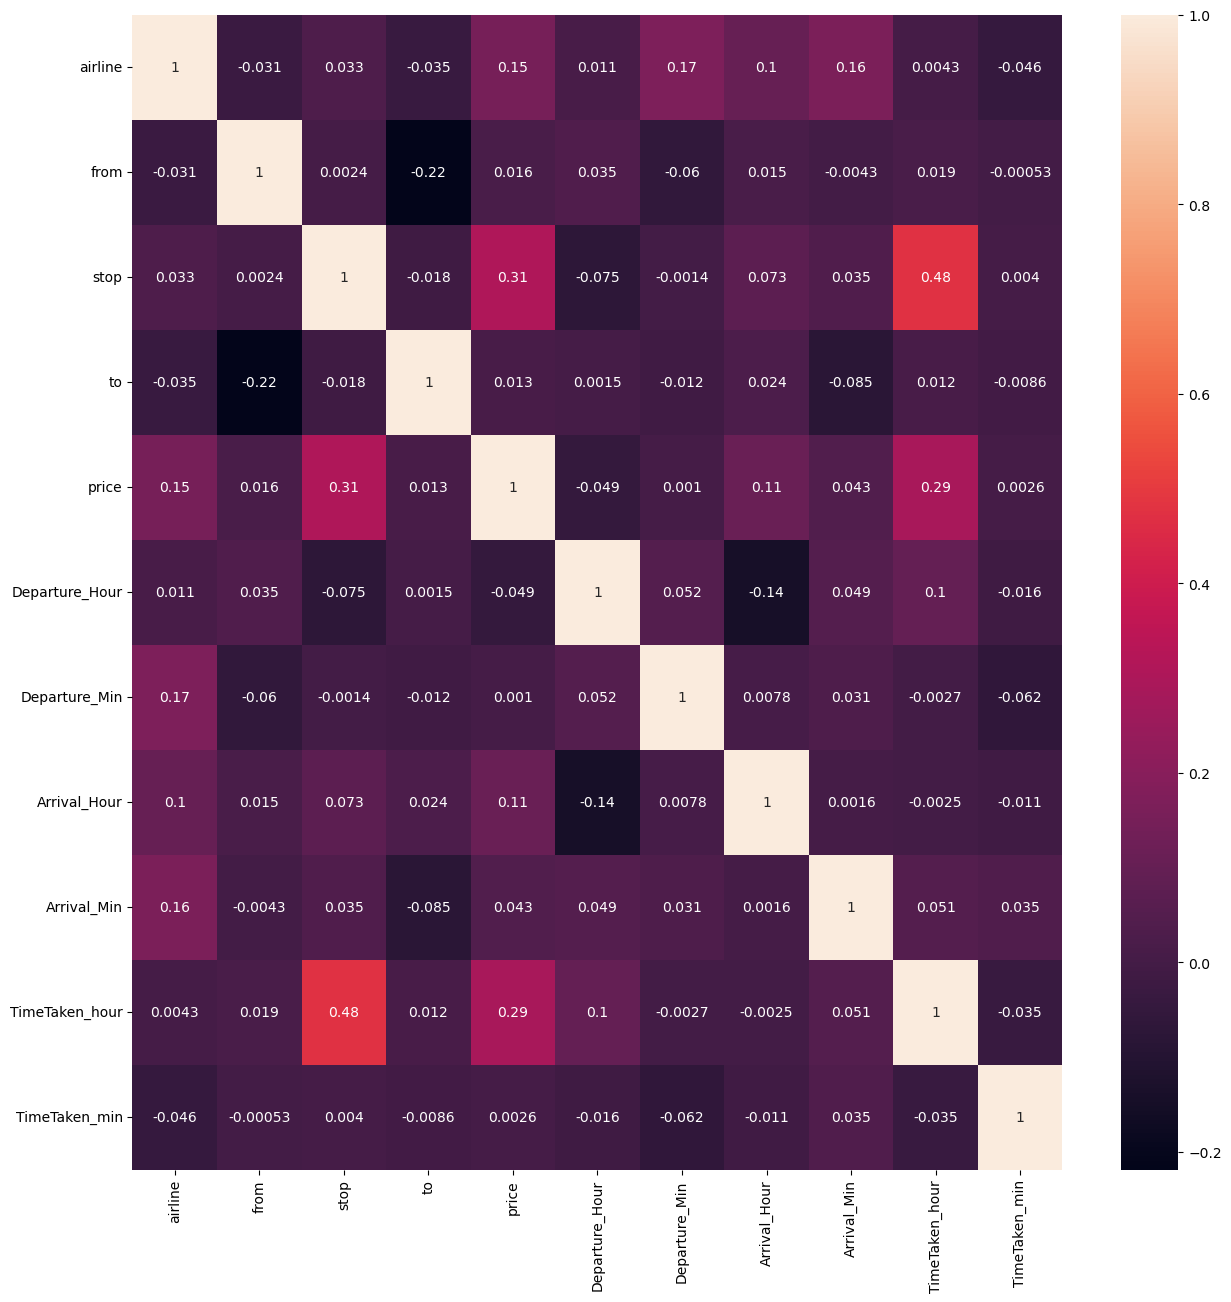

In [60]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

Scaling

In [61]:
X=df.drop(['price'],axis=1)
y=df['price']

In [62]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaled_X= scaler.fit_transform(X)

In [63]:
scaled_X[0]

array([ 0.22392161, -0.3310515 , -2.12872566,  1.38716853,  0.9619449 ,
        1.58263472,  0.9571436 , -1.31409499, -1.25571972, -0.9643914 ])

In [64]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.25,random_state=42)

In [65]:
X_train,X_test,y_train,y_test

(        airline  from  stop  to  Departure_Hour  Departure_Min  Arrival_Hour  \
 113833        3     0     1   3              10             55            19   
 46856         0     5     1   2               6             10            18   
 87870         1     0     2   2              16             25             1   
 31300         7     2     0   3               7             30             9   
 133776        2     4     0   5              12             30            15   
 ...         ...   ...   ...  ..             ...            ...           ...   
 119879        3     4     0   2              11             25            13   
 103694        7     0     1   4              19             40             8   
 131932        7     4     1   5              10             15            18   
 146867        3     4     1   3              16             30            23   
 121958        2     4     0   2               6              0             8   
 
         Arrival_Min  Time

In [66]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((155080, 10), (51694, 10), (155080,), (51694,))

Linear Regression

In [67]:
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [77]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

def calcMetrics(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

def accuracy(y,y_pred):
    err=abs(y-y_pred)
    k=100* np.mean(err/y)
    accuracy= 100 - k
    return accuracy

In [78]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [83]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Ada Boost":AdaBoostRegressor(),
    "Gradient Boost":GradientBoostingRegressor(),
    "Extra Tree Regressor":ExtraTreesRegressor()
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = calcMetrics(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = calcMetrics(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))

    print('----------------------------------')

    print("Accuracy: ",accuracy(y_test, y_test_pred))
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 3451.1132
- Mean Absolute Error: 2511.3677
- R2 Score: 0.1515
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3443.8465
- Mean Absolute Error: 2513.7383
- R2 Score: 0.1493
----------------------------------
Accuracy:  54.55141872692722


Lasso
Model performance for Training set
- Root Mean Squared Error: 3451.1143
- Mean Absolute Error: 2511.2724
- R2 Score: 0.1515
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3443.8450
- Mean Absolute Error: 2513.6195
- R2 Score: 0.1493
----------------------------------
Accuracy:  54.54949841040998


Ridge
Model performance for Training set
- Root Mean Squared Error: 3451.1132
- Mean Absolute Error: 2511.3667
- R2 Score: 0.1515
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3443.8465
- Mean Absolute Error: 2513.7371
- R2 Score: 0.1493
-

In [84]:
#Initialize few parameter for Hyperparamter tuning
etr_params = {"n_estimators": [100, 200, 500, 1000],
              "criterion":["squared_error", "absolute_error", "friedman_mse", "poisson"],
              "max_depth": [5, 8, 15, None, 10],
              "min_samples_split": [2, 8, 15, 20],
              "min_samples_leaf": [2, 8, 15, 20],
              "max_features":["sqrt","log2",None]}
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}

In [85]:
from sklearn.model_selection import RandomizedSearchCV

randomcv_models=[('ETR', ExtraTreesRegressor(), etr_params),
                   ("RF", RandomForestRegressor(), rf_params)
                   ]

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits


KeyboardInterrupt: 

In [88]:
## Retraining the models with best parameters
models = {
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, min_samples_split=2, max_features=10, max_depth=None, 
                                                     n_jobs=-1),
     "Extra trees Regressor": ExtraTreesRegressor(n_estimators=100, n_jobs=-1)
    
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae , model_train_rmse, model_train_r2 = calcMetrics(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = calcMetrics(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    
    print('----------------------------------')

    print("Accuracy: ",accuracy(y_test, y_test_pred))
    
    print('='*35)
    print('\n')

Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 2695.5012
- Mean Absolute Error: 1877.7225
- R2 Score: 0.4824
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2875.1846
- Mean Absolute Error: 2009.3434
- R2 Score: 0.4070
----------------------------------
Accuracy:  68.13919552689296


Extra trees Regressor
Model performance for Training set
- Root Mean Squared Error: 2687.7209
- Mean Absolute Error: 1858.9836
- R2 Score: 0.4854
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2880.9304
- Mean Absolute Error: 2001.5047
- R2 Score: 0.4046
----------------------------------
Accuracy:  68.33636653052531


